# Tasks with Long Sequences

Tasks that make use of long sequences include 

* Writing books 
* Storytelling
* Building intelligent agents for conversations like chatbots.

This week you will learn about the bottlenecks in these larger transformer models, and solutions you can use to make them trainable for you. You will also learn about the re-former model (AKA the reversible transformer). Here is what you will be building for your programming assignment: A chatbot! 

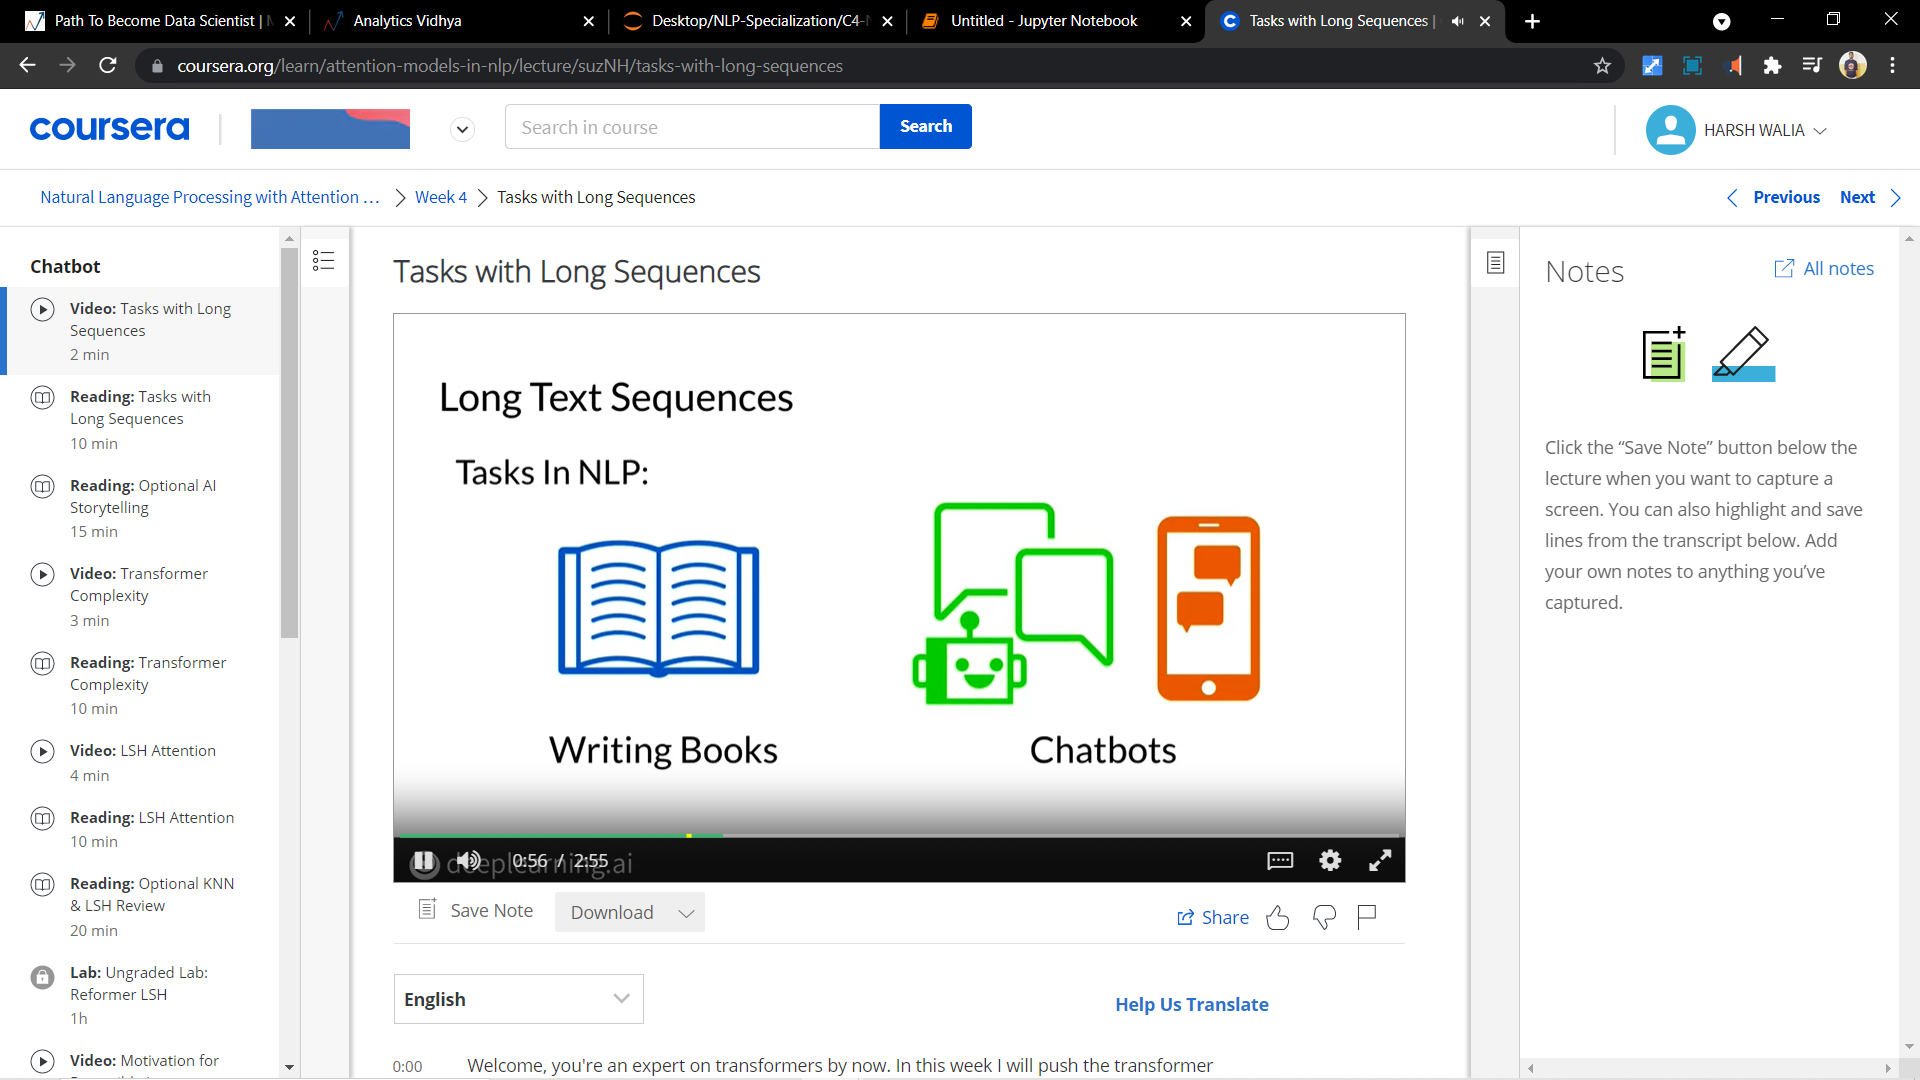

The models behind these long sequence applications presents considerable challenges, largely due to their size in training. Many are based on the GPT-3 transformer model, which is just a larger version of GPT-2 that you already know from previous weeks. But these models can take industrial scale compute and cost a lot of money to train. 

I'll teach you about the re former model known as the reversible transformer, I'll explain why it's important and how it works. Then you will use this new knowledge to build and train a real working chatbot in this week's assignments. 

Processing long text sequences is at the core of building chatbots. A chatbot model needs to use all the previous pieces of the conversation as inputs for the next reply, this can make for some really big context Windows.` But what exactly is a chatbot, and how does it relate to say context based question and answer, and closed loop based question and answer that you learned in the previous weeks.`
To recap the context based Q and A needs both a question and relevant text from where it's going to retrieve an answer.

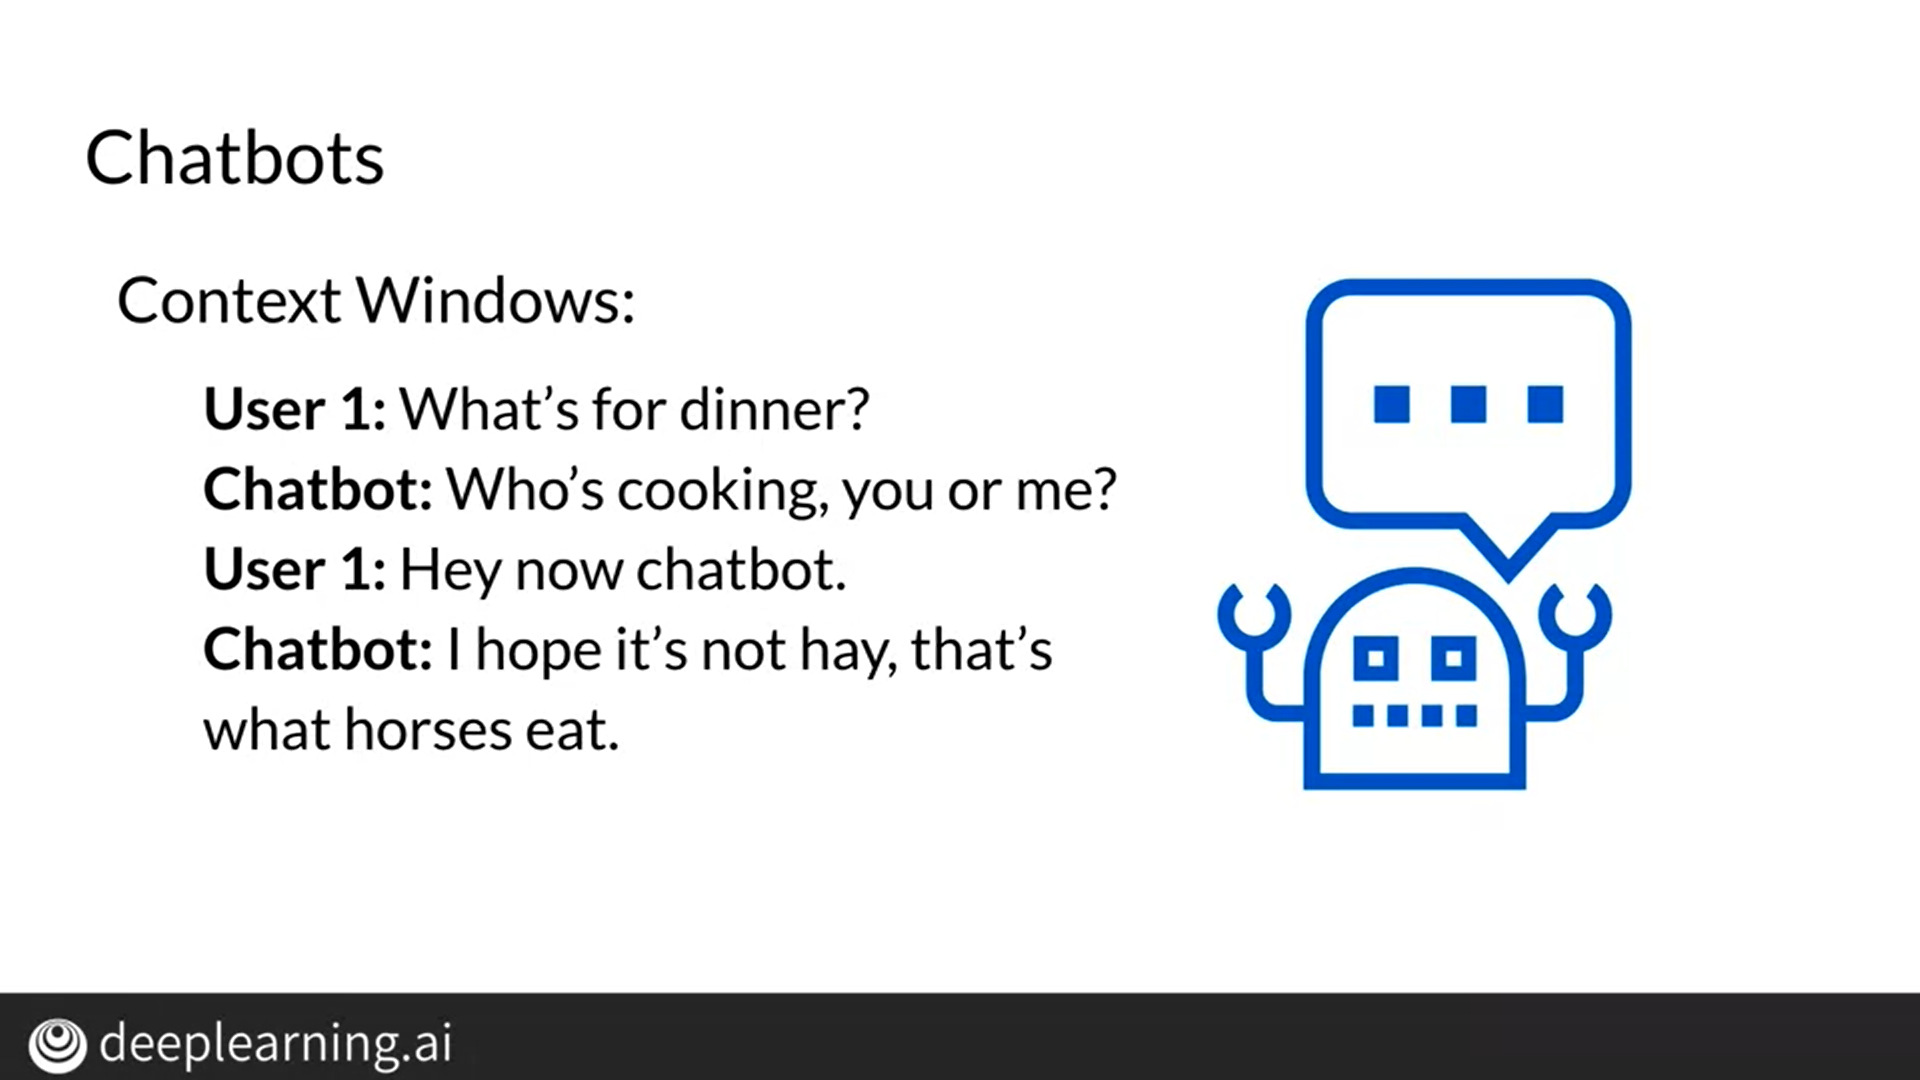

All the knowledge is stored in the weights of the model itself during training. And this is how your chat bot will work, and what you learn to do this week.

# Transformer Complexity

`If you try to run a large transformer on the long sequence, you just run out of memory. In this video, you'll understand why, and identify the two main parts responsible for that.`

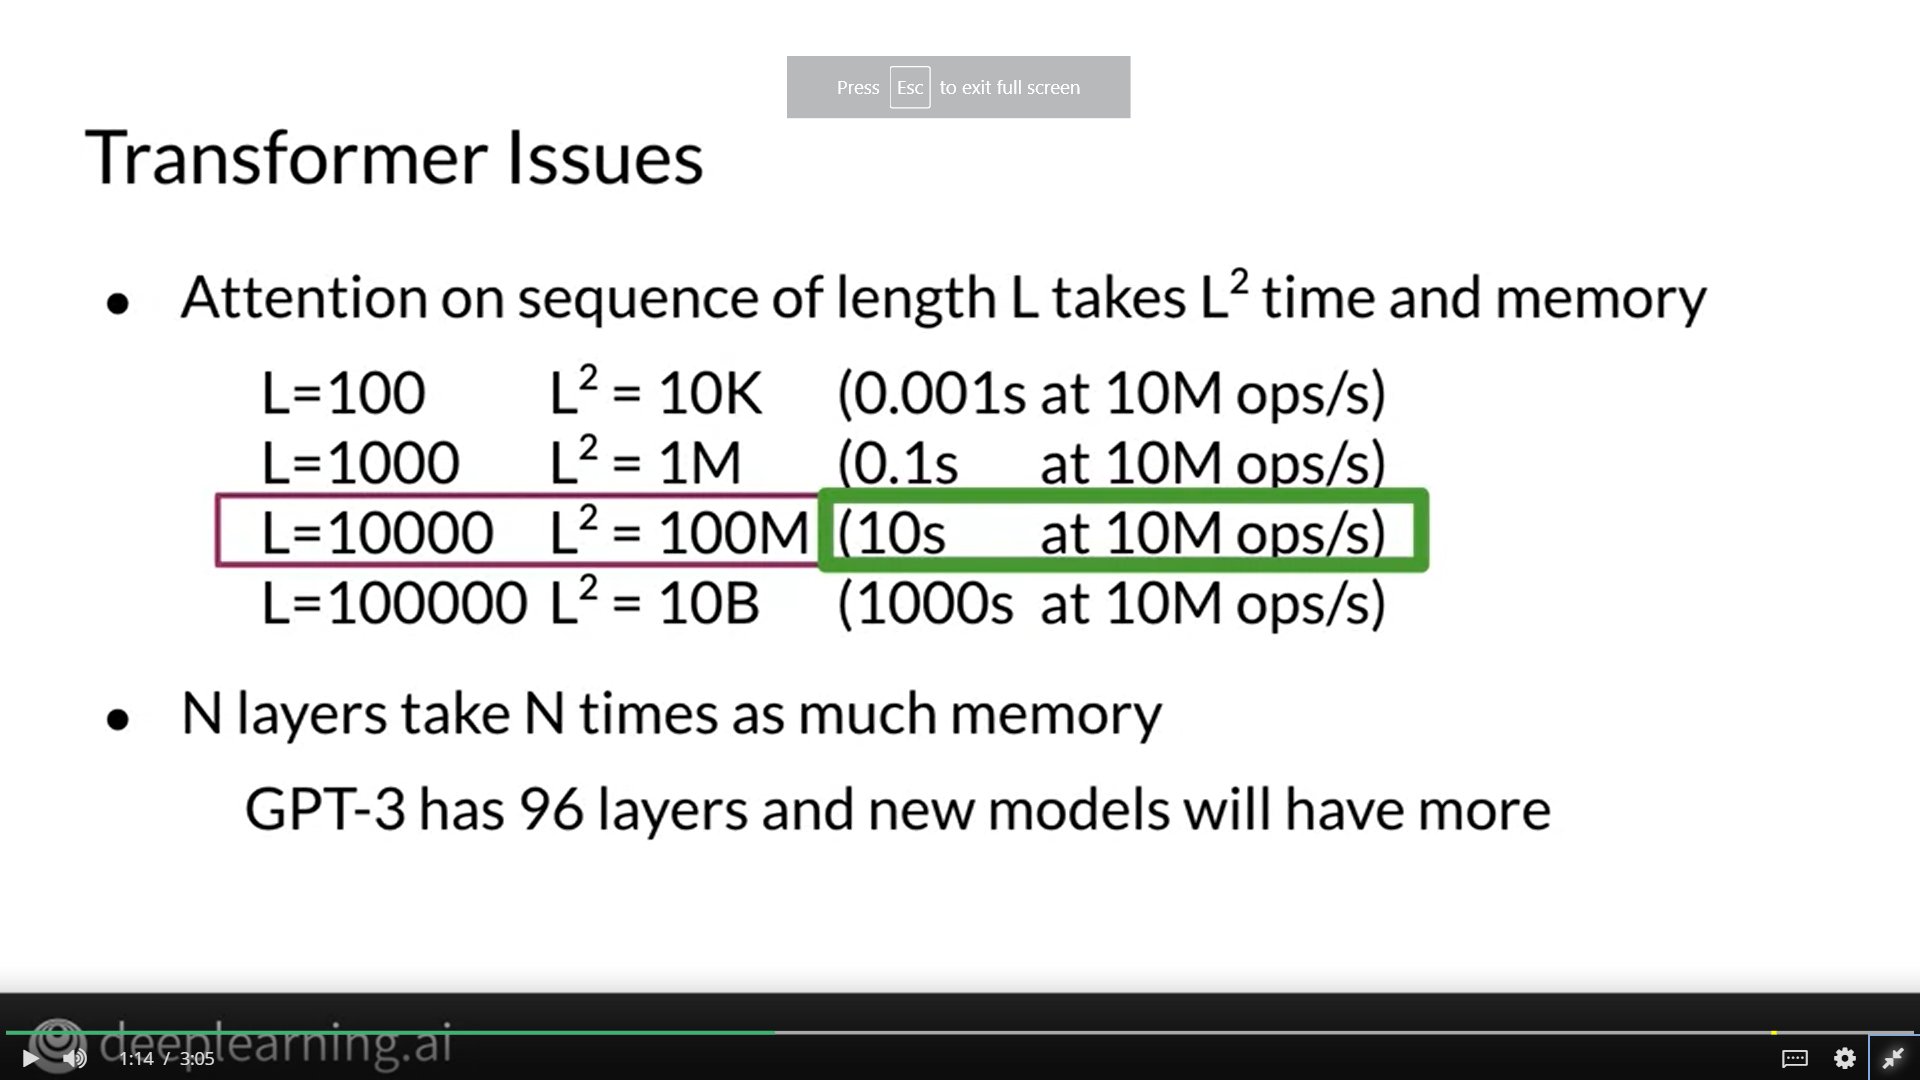

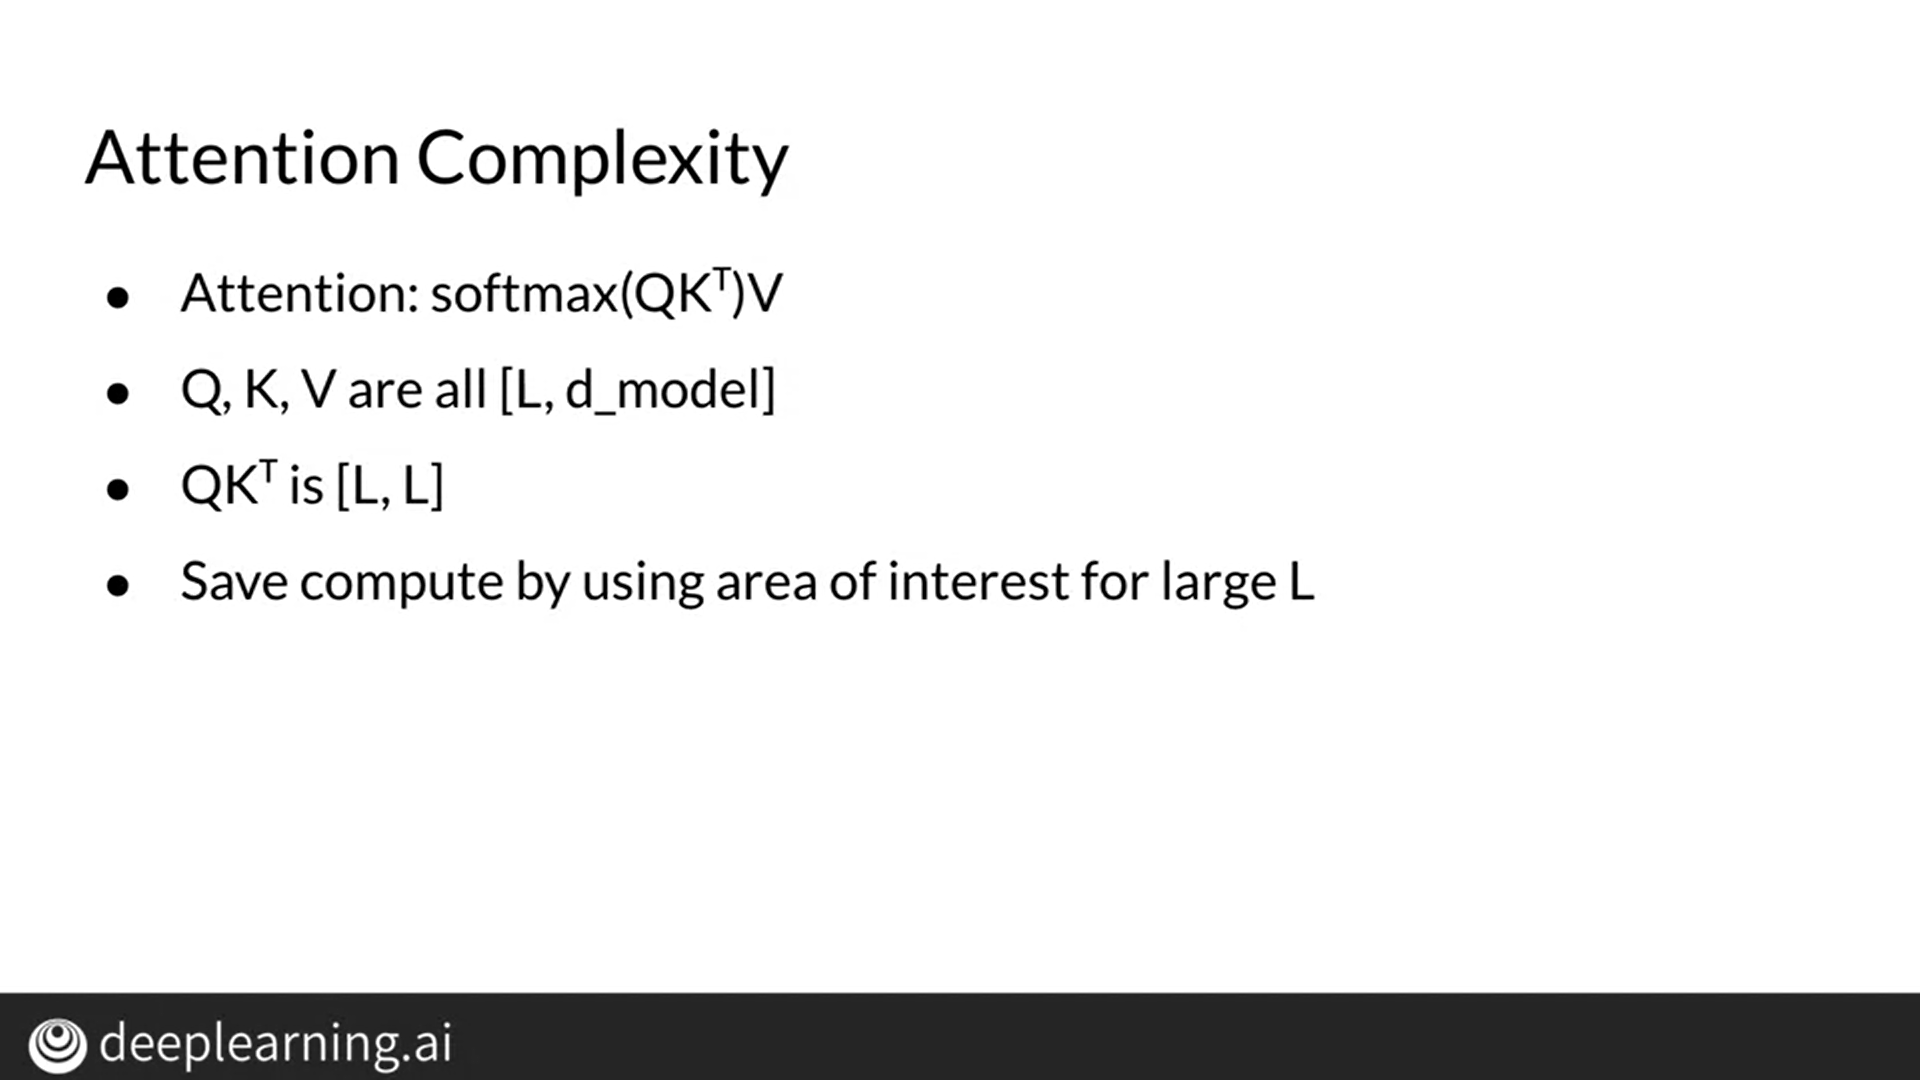

You can just focus on an area of interest instead. For example, when translating a long text from English to German, you don't need to consider every word at once. You can instead focus on a single word being translated, and those immediately around it, by using attention. 

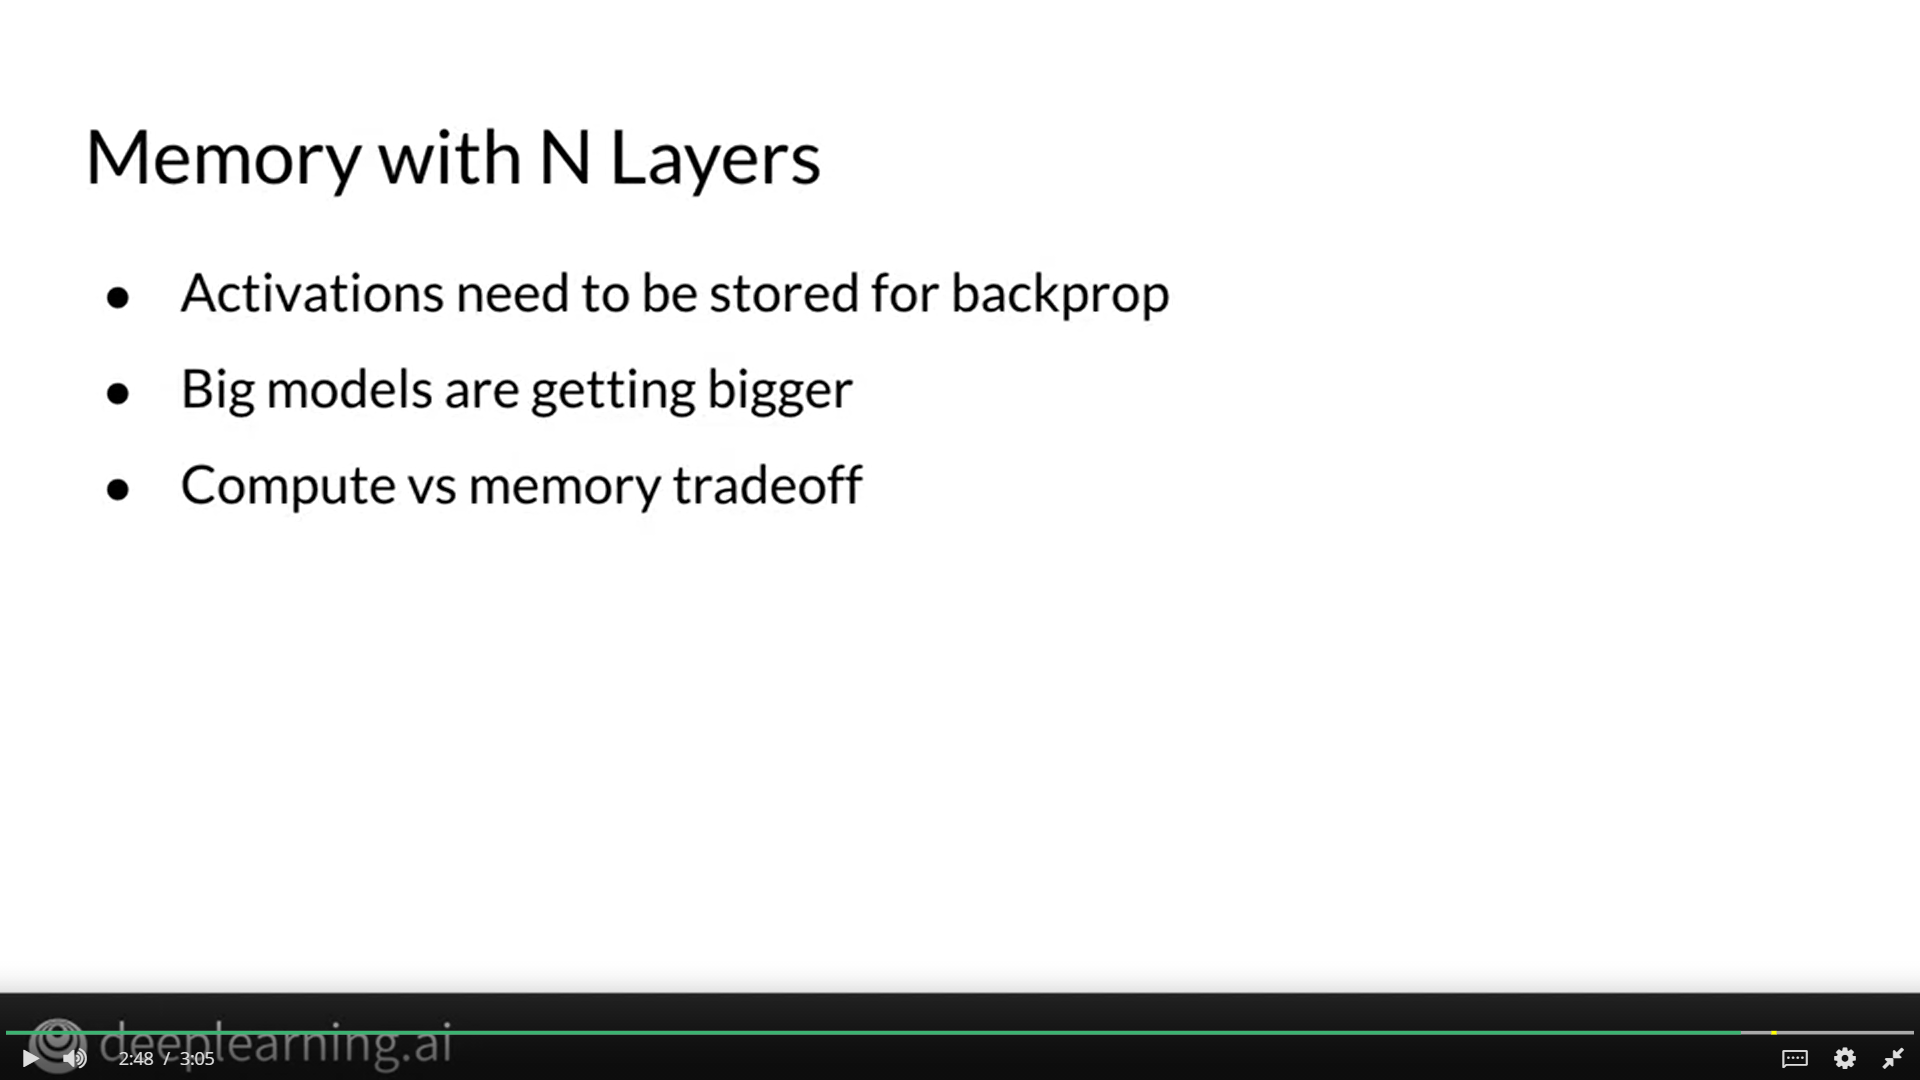

The more layers a model has, the more memory it needs. This is because you need to store the forward pass activations for backprop. You can overcome this memory requirements by recomputing activations, but it needs to be done efficiently to minimize taking too much extra time. GPT-3 for example, which already has 96 layers, would take a very long time to recompute activations, and these models will continue to get bigger. So what you need is a way to speed up this re-computation, so that it's efficient to use less memory and I'll show you how to do that next. 

# LSH Attention

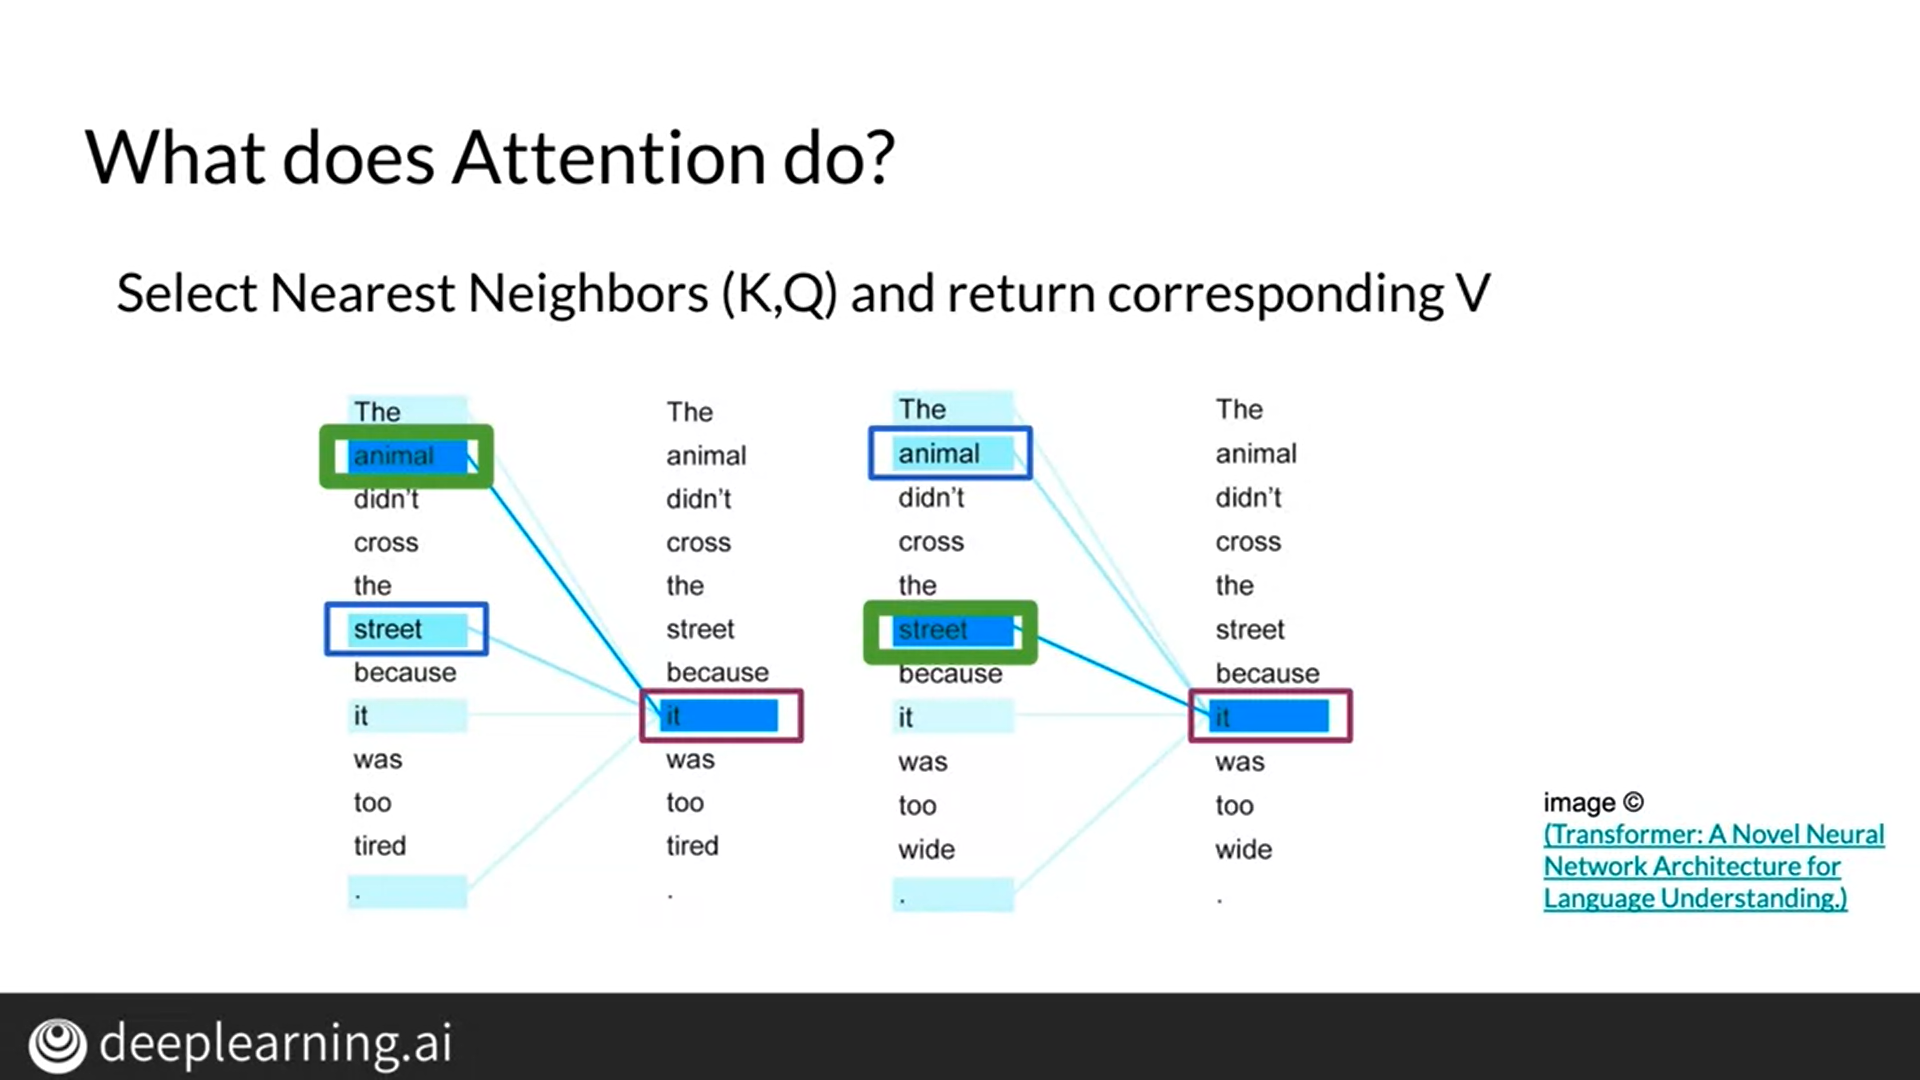

Take the word `it` attention is focused on certain words to determine if it refers to the `streets` or to the `animal`. For example, in the sentence the animal didn't cross the street because it was too tired, it refers to the `animal`. Or in the second example, the animal didn't cross the street because it was too wide, the only difference being the last word.


It again refers to either the streets or the animal, but in this case it refers to the streets. In both attentions you can see that it is either the animal or the streets. You only need to look at the nouns because it can only refer to the nouns, not all of the words. A pronoun is a word that substitutes for a noun. 

Its for animal or its for streets for example, as I just showed you. So when working with pronouns, you know you only need to look at the other nouns, and you can ignore the other words like it and was and tired. This is an example of why you only want to work with the nearest neighbors to speed up the attention parts.

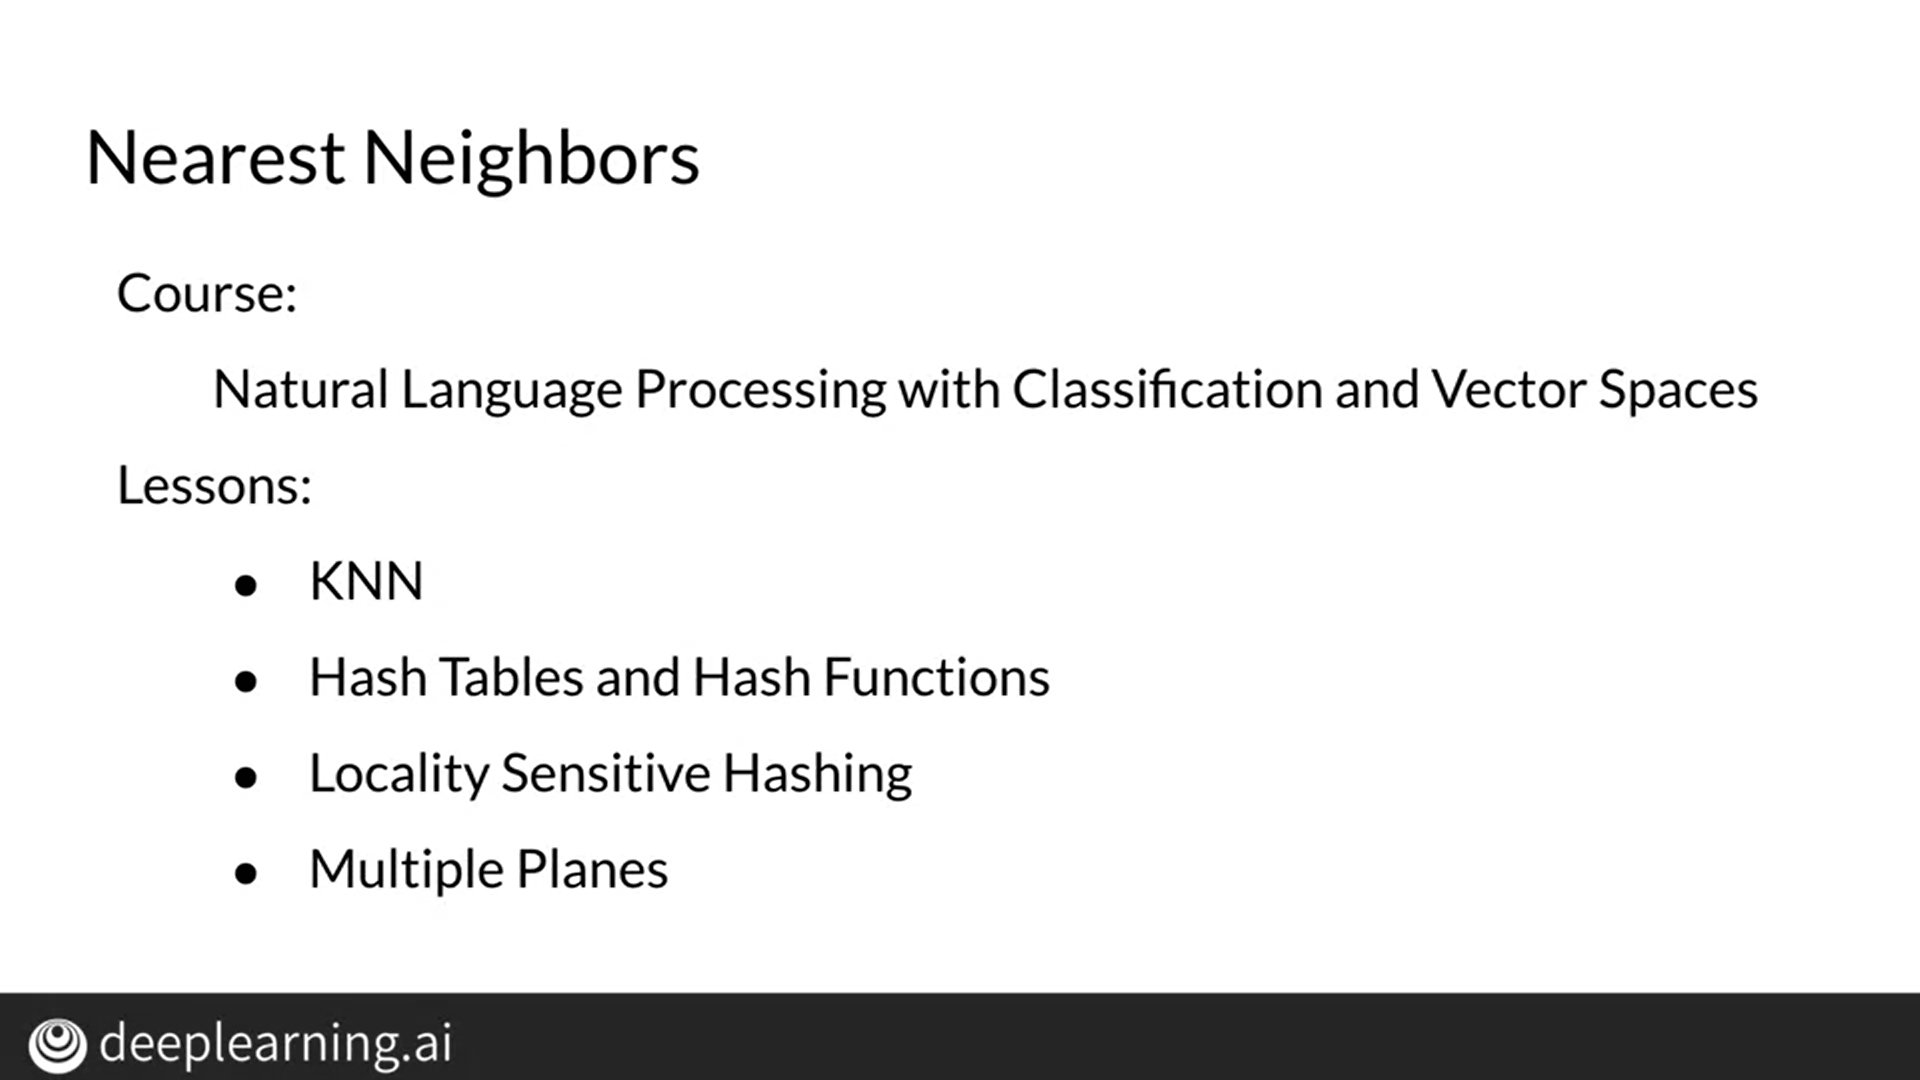

Locality sensitive hashing reduces the computational cost of finding k nearest neighbors.



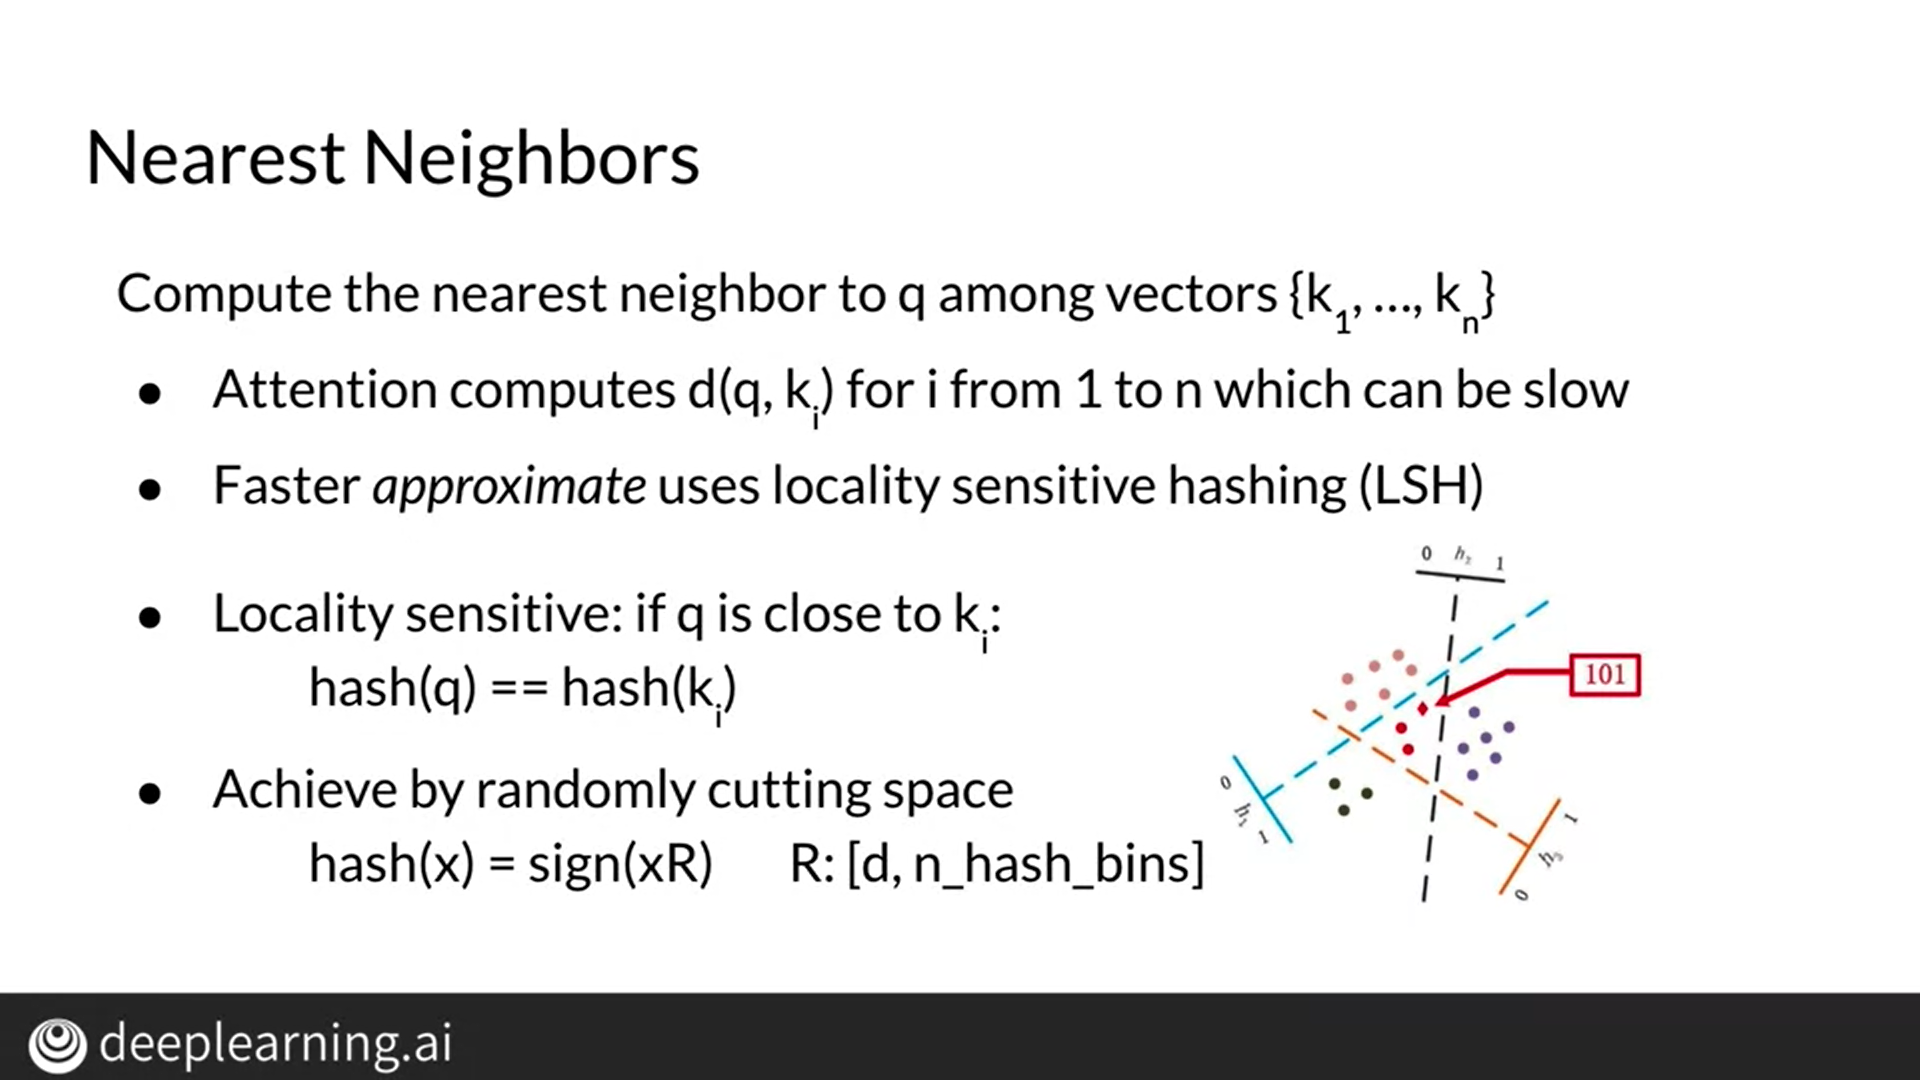

For Locality sensitive hashing see th c1/week-4/2KNN

You already know from earlier courses that you can use locality sensitive hashing to reduce the computational costs of finding K nearest neighbors. Let me show you how to do the same for attention. Using locality sensitive hashing, you can hash both the query q and (q, k). This helps you group similar query and key vectors together, just like the nouns with pronouns. Examples you saw before, then you only run attention on keys that are in the same hash buckets as the query. When choosing the hash you want to make the buckets roughly the same size. 

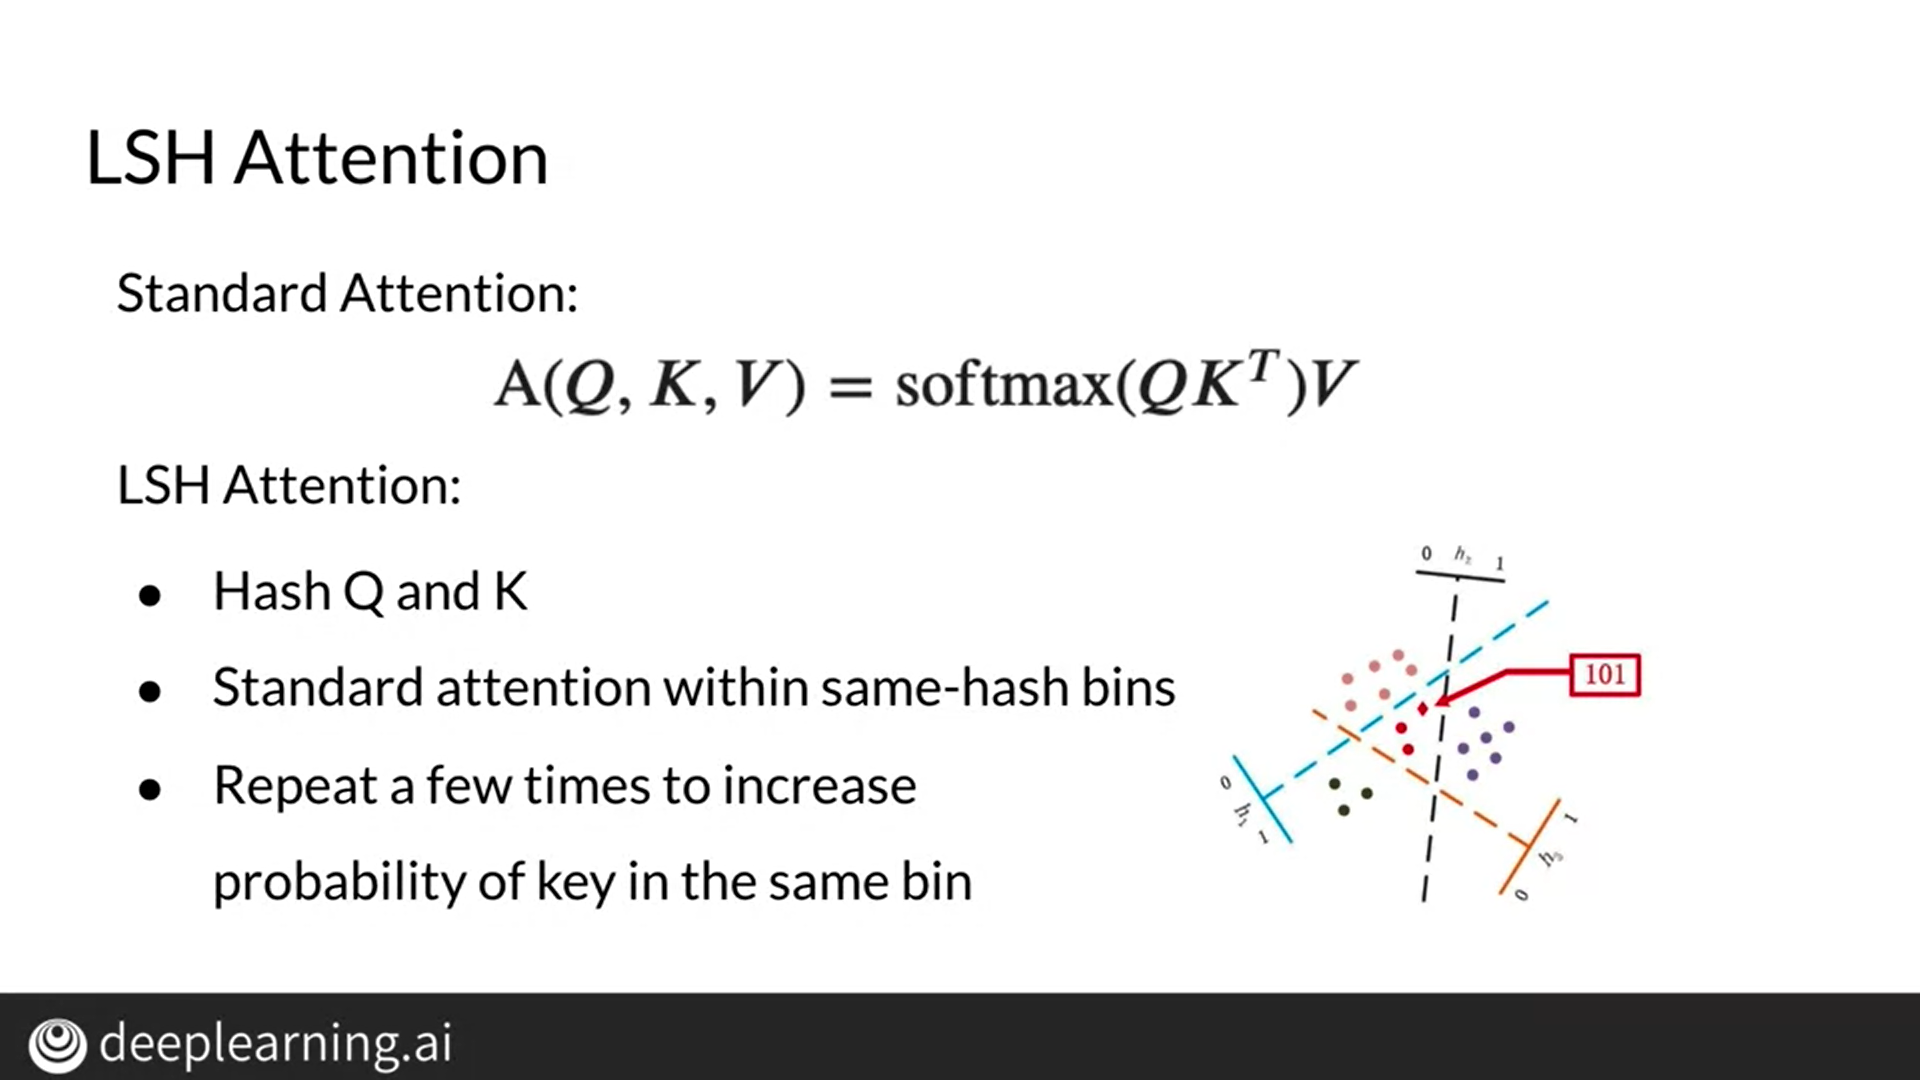

* You also already know how standard attention works. Well, let me show you how to speed this up using LSH attention.
* First you hash Q and K, then perform standard attention, but within the same-hash bins.
* This reduces the search space for each K to the same LSH bucket as Q.
* You can repeat this process multiple times to increase the probability of finding Q and K in the same bin. And this can be done efficiently to take advantage of parallel computing. 

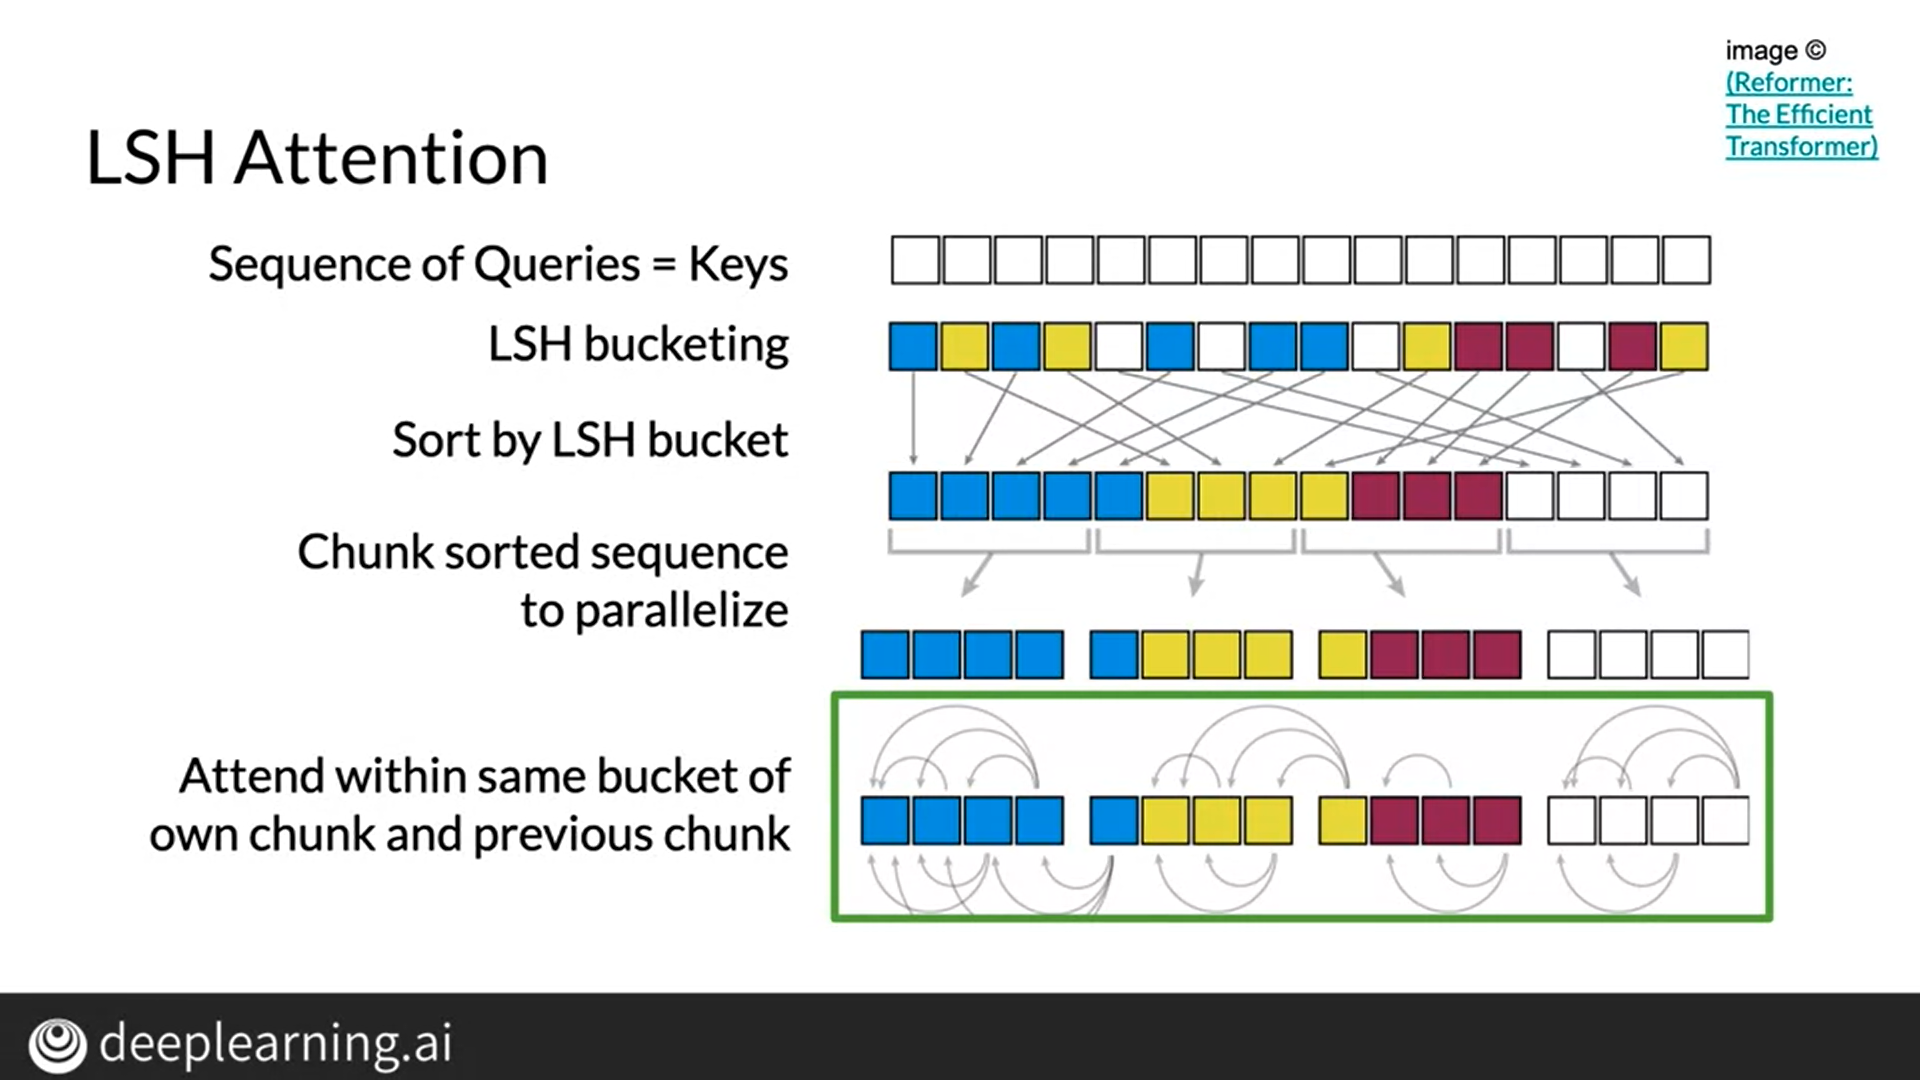

Locality-sensitive-hashing: Reformer takes in an input sequence of keys, where each key is a vector representing individual words (or pixels, in the case of images) in the first layer and larger contexts in subsequent layers. LSH is applied to the sequence, after which the keys are sorted by their hash and chunked. Attention is applied only within a single chunk and its immediate neighbors